
# Data Wrangling, Analysis and Visualization of @WeLoveDogs twitter data.


In [1]:
import pandas as pd
import numpy as np
import tweepy as ty
import requests
import json
import io
import time

## Gathering

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
image_response = requests.get(r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
image_df = pd.read_csv(io.StringIO(image_response.content.decode('utf-8')), sep='\t')

In [6]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
CONSUMER_KEY = '<My Consumer Key>'
CONSUMER_SECRET = '<My Consumer Secret>'
ACCESS_TOKEN = '<My Access Token>'
ACCESS_TOKEN_SECRET = '<My Access Token Secret>'

In [9]:
auth = ty.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

In [10]:
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [11]:
api = ty.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [12]:
tweet_count = 0
for id in df['tweet_id']:
    with open('tweet_json.txt', 'a') as file:
        try:
            start = time.time()
            tweet = api.get_status(id, tweet_mode='extended')
            st = json.dumps(tweet._json)
            file.writelines(st + '\n')
            tweet_count += 1
            if tweet_count % 20 == 0 or tweet_count == len(df): 
                end = time.time()
                print('Tweet id: {0}\tDownload Time: {1} sec\tTweets Downloaded: {2}.'.format(id, (end-start), tweet_count))
        except Exception as e:
            print('Exception occured for tweet {0} : {1}'.format(id, str(e)))

Exception occured for tweet 888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet id: 888078434458587136	Download Time: 0.5414106845855713 sec	Tweets Downloaded: 20.
Tweet id: 884562892145688576	Download Time: 0.5888540744781494 sec	Tweets Downloaded: 40.
Tweet id: 880465832366813184	Download Time: 0.9378821849822998 sec	Tweets Downloaded: 60.
Tweet id: 877316821321428993	Download Time: 1.639167308807373 sec	Tweets Downloaded: 80.
Exception occured for tweet 873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
Exception occured for tweet 872668790621863937 : [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
Tweet id: 872620804844003328	Download Time: 0.8575863838195801 sec	Tweets Downloaded: 100.
Exception occured for tweet 869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet id: 868880397819494401	Download Time: 0.9696576595306396 sec	Tweets Downloaded: 120.
Exception occured for

Rate limit reached. Sleeping for: 157


Tweet id: 757400162377592832	Download Time: 0.5604689121246338 sec	Tweets Downloaded: 900.
Exception occured for tweet 754011816964026368 : [{'code': 144, 'message': 'No status found with that ID.'}]
Tweet id: 753420520834629632	Download Time: 0.552344560623169 sec	Tweets Downloaded: 920.
Tweet id: 751793661361422336	Download Time: 0.5140857696533203 sec	Tweets Downloaded: 940.
Tweet id: 750056684286914561	Download Time: 3.5470778942108154 sec	Tweets Downloaded: 960.
Tweet id: 748568946752774144	Download Time: 0.9564249515533447 sec	Tweets Downloaded: 980.
Tweet id: 747204161125646336	Download Time: 0.5992581844329834 sec	Tweets Downloaded: 1000.
Tweet id: 745057283344719872	Download Time: 0.5584239959716797 sec	Tweets Downloaded: 1020.
Tweet id: 742423170473463808	Download Time: 0.5469968318939209 sec	Tweets Downloaded: 1040.
Tweet id: 739844404073074688	Download Time: 0.8060572147369385 sec	Tweets Downloaded: 1060.
Tweet id: 736736130620620800	Download Time: 0.6043558120727539 sec	Tw

Rate limit reached. Sleeping for: 180


Tweet id: 676617503762681856	Download Time: 0.5260066986083984 sec	Tweets Downloaded: 1800.
Tweet id: 676121918416756736	Download Time: 0.5198206901550293 sec	Tweets Downloaded: 1820.
Tweet id: 675534494439489536	Download Time: 0.535010576248169 sec	Tweets Downloaded: 1840.
Tweet id: 675135153782571009	Download Time: 0.6806423664093018 sec	Tweets Downloaded: 1860.
Tweet id: 674743008475090944	Download Time: 0.5525469779968262 sec	Tweets Downloaded: 1880.
Tweet id: 674330906434379776	Download Time: 0.5199909210205078 sec	Tweets Downloaded: 1900.
Tweet id: 674014384960745472	Download Time: 0.5537633895874023 sec	Tweets Downloaded: 1920.
Tweet id: 673656262056419329	Download Time: 0.529094934463501 sec	Tweets Downloaded: 1940.
Tweet id: 673148804208660480	Download Time: 0.5641758441925049 sec	Tweets Downloaded: 1960.
Tweet id: 672604026190569472	Download Time: 0.8205358982086182 sec	Tweets Downloaded: 1980.
Tweet id: 672222792075620352	Download Time: 0.8795161247253418 sec	Tweets Download

In [13]:
print('There are {} records for which tweets does not exist in Twitter database.'.format(len(df) - tweet_count))

There are 15 records for which tweets does not exist in Twitter database.


In [14]:
tweet_ids = []
favorite_count = []
retweet_count = []

In [15]:
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        data = json.loads(line)
        tweet_ids.append(data['id'])
        favorite_count.append(data['favorite_count'])
        retweet_count.append(data['retweet_count'])

In [16]:
favorite_retweet_df = pd.DataFrame(data={'tweet_id': tweet_ids, 'favorite_count': favorite_count, 
                                         'retweet_count': retweet_count})

In [17]:
favorite_retweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38439,8449
1,892177421306343426,32929,6224
2,891815181378084864,24814,4125
3,891689557279858688,41787,8570
4,891327558926688256,39960,9307


In [18]:
favorite_retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Assessing

### Quality Issues

 - The WeRateDogs Twitter archive contains some retweets also. We only need to consider original tweets for this project.
 - `tweet_id` column having integer datatype in all the dataframes. Conversion to string required. Since, We are not going to do any mathematical operations with it.
 - `rating_denominator` value should be 10 since we are giving rating out of 10.
 - For some tweets, The values of `rating_numerator` column are very high, possibly outliers.
 - `name` column has **None** string and *a*, *an*, *the* as values.
 - Extract dog **stages** from the tweet text (if present) for null values.
 - `timestamp` column is given as **string**. Convert it to date.
 - Since we are not using retweets, `in_reply_to_status_id`, `in_reply_to_user_id`, `source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns are not required.
 - `image_df` contains tweets that do not belong to a dog. 
 - `source` column in main dataframe is of no use in the analysis as it only tell us about the source of tweet.
 
### Tidiness Issues

 - A dog can have one stage at a time, still we are having 4 columns to store one piece of information.
 - We are having 3 predicted breeds of dogs in the image prediction file. But only required the one with higher probability, given that it is a breed of dog.
 - All 3 dataframes contains same tweet_id column, which we can use to merge them and use as one dataframe for our analysis.

In [19]:
sum(df.duplicated())

0

In [20]:
# name and stages having wrong values for no. of records
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [21]:
# tweet id is int64, retweet related columns are not required
# name and dog stages showing full data but most of them are None.
# timestamp having string datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# rating_numerator is having min value of 0 and max of 1776 (outliers)
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
# denominator value should be 10
sum(df['rating_denominator'] != 10)

23

In [24]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

## Cleaning

In [25]:
# Making a copy of the data so that original data will be unchanged
df_clean = df.copy()
image_df_clean = image_df.copy()
favorite_retweet_df_clean = favorite_retweet_df.copy()

## Quality Issues

### Define

 - Replacing all the **None** strings and *a*, *an* and *the* to **np.nan** in `name` column using pandas **_replace()_** function. 
 
### Code

In [26]:
df_clean['name'] = df_clean['name'].replace({'None': np.nan, 'a': np.nan, 'an': np.nan, 'the': np.nan})

### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1541 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define

- `tweet_id` column having integer datatype in all the dataframes. Converting it to string using pandas **_astype()_** function.
- `timestamp` column is given as string. Converting it to date using pandas **to_datetime()** function.

### Code

In [28]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype(str)
favorite_retweet_df_clean['tweet_id'] = favorite_retweet_df_clean['tweet_id'].astype(str)

In [29]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

### Test

In [30]:
df_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [31]:
image_df_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [32]:
favorite_retweet_df_clean.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

### Define

- Converting `rating_denominator` column value to 10 value when it is not, using pandas boolean indexing. Since we are giving rating out of 10.

### Code

In [33]:
df_clean.loc[df_clean.rating_denominator != 10, 'rating_denominator'] = 10

### Test

In [34]:
sum(df_clean.rating_denominator != 10)

0

### Define

- Removing retweets since we are only concerned about original tweets. Since, there is null present in `in_reply_to_status_id`, `retweeted_status_id` columns for retweets. Droping these records using the pandas drop() function.

### Code

In [35]:
df_clean.drop(index=df_clean[df_clean.retweeted_status_id.notnull()].index, inplace=True)

In [36]:
df_clean.drop(index=df_clean[df_clean.in_reply_to_status_id.notnull()].index, inplace=True)

### Test

In [37]:
sum(df_clean.retweeted_status_id.notnull())

0

In [38]:
sum(df_clean.in_reply_to_status_id.notnull())

0

### Define

- Removing `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns since they are related to retweet info. Hence, not required.

### Code

In [39]:
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                       'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Test

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1425 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Define

- Removing `source` column from df_clean using pandas **_drop_** function.

### Code

In [41]:
df_clean.drop(columns=['source'], inplace=True)

### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1425 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 196.6+ KB


## Tidiness Issues

### Define

- Replacing 3 predictions to one dog breed with higher probability, given that it is a breed of dog, with the use of pandas **_apply()_** function.

### Code

In [43]:
non_dog_ind = image_df_clean.query('not p1_dog and not p2_dog and not p3_dog').index

In [44]:
image_df_clean.drop(index=non_dog_ind, inplace=True)

In [45]:
def get_priority_dog(dog):
    return dog['p1'] if dog['p1_dog'] else dog['p2'] if dog['p2_dog'] else dog['p3']

In [46]:
image_df_clean['dog_breed'] = image_df_clean.apply(get_priority_dog, axis=1)

In [47]:
image_df_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], 
                    inplace=True)

### Test

In [48]:
image_df_clean.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


### Define

- There are 4 column present for specifing dog breed, which can be done using one column only. Creating a column name `dog_stage` and adding present dog breed in it.

### Code

In [49]:
def get_dog_stage(dog):
    if dog['doggo'] != 'None':
        return dog['doggo']
    elif dog['floofer'] != 'None':
        return dog['floofer']
    elif dog['pupper'] != 'None':
        return dog['pupper']
    else:
        return dog['puppo'] # if last entry is also nan, we have to return nan anyway

In [50]:
df_clean['dog_stage'] = df_clean.apply(get_dog_stage, axis=1)

In [51]:
df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1425 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.4+ KB


### Define

- All 3 dataframes contains same `tweet_id` column, which we can use ot merge them and use as one dataframe for our analysis.

### Code

In [53]:
df_clean = pd.merge(df_clean, image_df_clean, on='tweet_id')

In [54]:
df_clean = pd.merge(df_clean, favorite_retweet_df_clean, on='tweet_id')

### Test

In [55]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32929,6224
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,24814,4125
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,41787,8570
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,39960,9307
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,20053,3081


## Quality Issues

### Define

- Try to extract dog dstage from tweet text using regular expressions and series **_str.extract()_** function.

### Code

In [56]:
stages = df_clean[df_clean.dog_stage == 'None'].text.str.extract(r'(doggo|pupper|floof|puppo|pup)', expand=True)

In [57]:
len(df_clean[df_clean.dog_stage == 'None'])

1408

In [58]:
df_clean.loc[stages.index, 'dog_stage'] = stages[0]

### Test

In [59]:
len(df_clean[df_clean.dog_stage.isnull()])

1200

### Define

- Removing outliers from `rating_numerator`

### Code

In [60]:
df_clean.boxplot(column=['rating_numerator'], figsize=(20,8), vert=False)

- As clear from the boxplot, `rating_numerator` has a number of outliers which can affect our analysis. So, removing all the rating points above 15 abd below 7 to reduce the effect of outliers.

In [61]:
df_clean.drop(index=df_clean.query('rating_numerator > 15 or rating_numerator < 7').index, inplace=True)

### Test

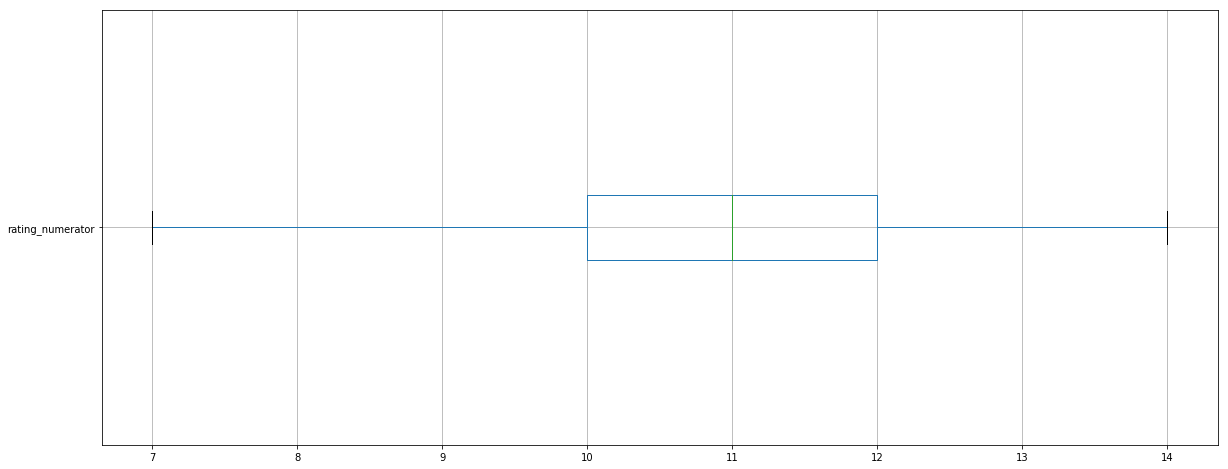

In [62]:
df_clean.boxplot(column=['rating_numerator'], figsize=(20,8), vert=False)

- As we can see now, there are no outliers present in the datat anymore.

## Storing Data in a CSV file

In [63]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
print('Save Done !')

Save Done !


## Data Analysis and Visualization

Text(0,0.5,'Favorites')

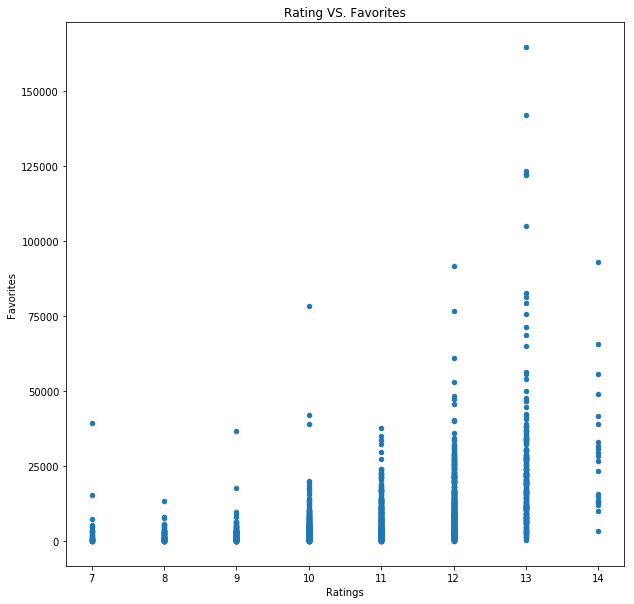

In [64]:
ax = df_clean.plot.scatter('rating_numerator', 'favorite_count', figsize=(10, 10), title='Rating VS. Favorites')
ax.set_xlabel('Ratings')
ax.set_ylabel('Favorites')

## Insight 1:

- Number of favorite count is increasing with the rating. i.e. Dogs getting more rating in the tweets are likely to receive more likes (favorites). 

In [65]:
df_clean.dog_breed.value_counts()

golden_retriever                  153
Labrador_retriever                103
Pembroke                           91
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         39
malamute                           33
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     30
Eskimo_dog                         22
Cardigan                           21
miniature_pinscher                 21
German_shepherd                    21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             19
Siberian_husky                     19
Rottweiler                         18
Shetland_sheepdog                  18
Maltese_dog                        17
Lakeland_terrier                   17
Italian_greyhound                  16
basset      

## Insight 2

- Most of the pictures present in @WeLoveDogs twitter account are of Golden Retriever, followed by Labrador Retriever, Pembroke and Chihuahua          .

In [66]:
df_clean.loc[df_clean.favorite_count.idxmax()][['dog_breed', 'favorite_count']]

dog_breed         Labrador_retriever
favorite_count                164521
Name: 685, dtype: object

In [67]:
df_clean.loc[df_clean.favorite_count.idxmin()][['dog_breed', 'favorite_count']]

dog_breed         English_setter
favorite_count                80
Name: 1649, dtype: object

In [68]:
df_clean.loc[df_clean.retweet_count.idxmax()][['dog_breed', 'retweet_count']]

dog_breed        Labrador_retriever
retweet_count                 84545
Name: 685, dtype: object

In [69]:
df_clean.loc[df_clean.retweet_count.idxmin()][['dog_breed', 'retweet_count']]

dog_breed        English_setter
retweet_count                12
Name: 1649, dtype: object

## Insight 3

- The dog with highest number of favorites (likes) is an Labrador retriever while the one with lowest number of favorites is an english setter.
- The same dogs who got highest and lowest favorites count also received highest and lowest retweet count respectively.

**So, if a tweet got more likes(favorites), it got better chances to have more retweets than the one who got low number of likes(favorites) and vice versa.**